In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [6]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [7]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

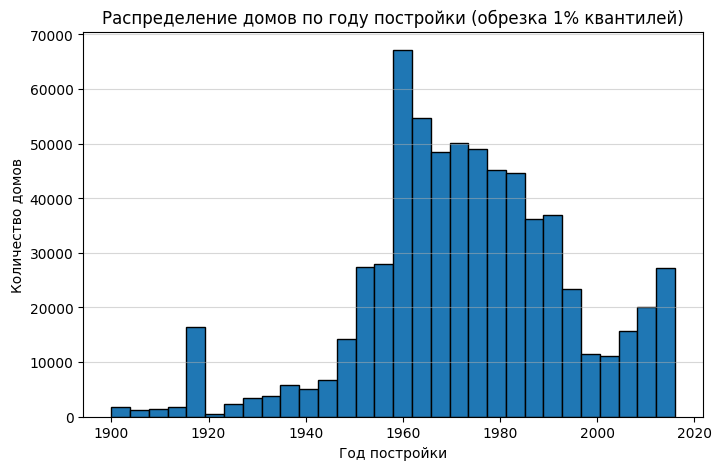

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [9]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


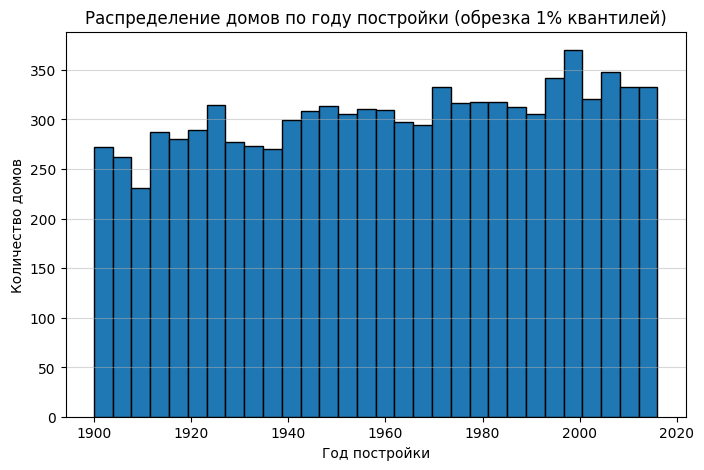

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [11]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [12]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [13]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [14]:
regions = [
    "Астраханская",
    "Волгоградская",
    "Краснодарский",
    "Адыгея",
    "Калмыкия",
    "Крым",
    "Ростовская",
    "Севастополь"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [15]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [16]:
df_cut.isna().sum()

formalname_region        0
built_year           30352
energy_efficiency        0
area_total           15992
dtype: int64

In [17]:
df_cut_cleaned = df_cut.dropna()


In [18]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_16020\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [19]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
4,Адыгея,2008.0,B++,76.7,48.321
16,Адыгея,1992.0,D,2117.0,2117.000
17,Адыгея,1992.0,D,2117.0,2117.000
19,Адыгея,2012.0,C,2946.0,2504.100
20,Адыгея,1973.0,D,4361.0,4361.000
...,...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2,522.070
1026338,Севастополь,1950.0,C,348.1,295.885
1026339,Севастополь,1955.0,C,632.5,537.625
1026340,Севастополь,2018.0,A,2203.4,1322.040


In [20]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [21]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Адыгея,1677.0,E,10003.875
1,Адыгея,1917.0,B++,252.189
2,Адыгея,1927.0,E,2340.125
3,Адыгея,1929.0,E,688.625
4,Адыгея,1930.0,D,2159.100
...,...,...,...,...
3512,Севастополь,2019.0,B+,9513.438
3513,Севастополь,2019.0,B++,6809.103
3514,Севастополь,2019.0,C,32782.970
3515,Севастополь,2019.0,D,15955.000


In [22]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Адыгея,1677.0,10003.8750,1.000388e+04
1,Адыгея,1917.0,252.1890,1.025606e+04
2,Адыгея,1927.0,2340.1250,1.259619e+04
3,Адыгея,1929.0,688.6250,1.328481e+04
4,Адыгея,1930.0,5996.3000,1.928111e+04
...,...,...,...,...
858,Севастополь,2016.0,190359.1530,1.107621e+07
859,Севастополь,2017.0,78233.6100,1.115445e+07
860,Севастополь,2018.0,41066.9025,1.119552e+07
861,Севастополь,2019.0,65060.5110,1.126058e+07


In [23]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Адыгея,1677.0,10003.875,10003.875
1,Адыгея,1917.0,252.189,10256.064
2,Адыгея,1927.0,2340.125,12596.189
3,Адыгея,1929.0,688.625,13284.814
4,Адыгея,1930.0,5996.300,19281.114


In [24]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -4.49, -4.18, -4.42, -4.71, -4.77, -4.35, -4.13, -4.76, -4.21, -4.65,
        -4.75, -4.77, -4.29, -4.50, -4.39, -4.50, -4.87, -4.44, -4.41, -4.32,
        -4.43, -4.61, -4.28, -5.02, -4.89, -4.47, -4.57, -3.90, -4.13, -4.42,
        -3.11, -4.06, -3.89, -4.40, -4.20, -3.90, -3.37, -3.44, -3.95, -3.27,
        -3.47, -3.75, -2.95, -3.48, -3.32, -3.13, -2.85, -3.08, -2.80, -2.88,
        -2.97, -2.77, -3.29, -2.76, -2.63, -2.71, -2.40, -2.36, -2.30, -2.74,
        -2.39, -2.77, -1.67, -2.72, -2.92, -1.92, -2.12, -1.69, -1.87, -2.07,
        -1.89, -2.05, -1.83, -1.75, -2.11, -1.76, -1.57, -1.89, -1.66, -2.04,
        -1.06, -1.28, -1.78, -1.81, -1.50, -1.36, -2.32, -0.99, -0.90, -1.78,
        -0.80, -1.15, -1.26, -0.73, -0.71, -1.24, -0.84, -1.23, -1.41, -0.78,
        -1.21
    ]
}

df_sfo_climate = pd.DataFrame(data_climate)
df_sfo_climate

,Год,Зима
0,1960,-4.49
1,1961,-4.18
2,1962,-4.42
3,1963,-4.71
4,1964,-4.77
...,...,...
96,2056,-0.84
97,2057,-1.23
98,2058,-1.41
99,2059,-0.78


In [25]:

data_region_heat = {
    "Республика Адыгея": [
        446.8, 391.3, 404.2, 386.8, 486.4, 634.5, 421.2, 354, 409.1, 450.8,
        351.8, 441.2, 361.5, 326.9, 311.5, 318.6, 339.00, 298.8, 315.1, 307.94,
        332.15, 348.7, 341.79, 353.0, 363.5
    ],
    "Республика Калмыкия": [
        281.9, 281.2, 286.7, 292.2, 285.2, 272.7, 252.3, 235.1, 208.4, 134.6,
        122.5, 116.4, 124.1, 163.3, 195.1, 165.2, 168.30, 158.8, 161.4, 150.76,
        155.32, 156.52, 154.0, 152.9, 149.4
    ],
    "Республика Крым": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1094.2, 1466.3, 1627.90, 1545.5,
        1557.2, 1509.2, 1489.94, 1563.70, 1599.5, 1495.5, 1493.3
    ],
    "Краснодарский край": [
        5134.9, 4800.9, 4952.4, 5120.4, 4753.3, 4765.6, 4671.8, 4383.3, 4561.9,
        4373.7, 3852.1, 4803.5, 4567.6, 4527.0, 4858.8, 4930.9, 5133.10, 5300.9,
        5212.9, 5182.17, 5410.35, 5994.35, 6060.2, 6144.2, 6672.7
    ],
    "Астраханская область": [
        2257, 1996.2, 1810.6, 1978.9, 2100, 2022.2, 1995.6, 1798.6, 1726.8, 1259.1,
        1947.5, 1974.3, 1872, 1899.9, 1922.4, 1887.4, 1843.70, 1787.5, 1739.9, 1731.02,
        1703.26, 1779.16, 1659.7, 1528.0, 1673.7
    ],
    "Волгоградская область": [
        6271.6, 6243.1, 6555.6, 6945.2, 6791.5, 6581.3, 6704.0, 6313.4, 6266.2,
        6307.9, 6295.5, 6335.5, 6138.2, 5912.5, 5743.5, 5822.3, 5883.30, 5540.7,
        5669.7, 5450.31, 5601.00, 5505.44, 5376.51, 5287.0, 5428.6
    ],
    "Ростовская область": [
        6003.7, 6342.5, 6592, 6662.8, 6553.1, 6635.8, 6439.0, 6386, 6430.0, 6326.6,
        6262.2, 6600.8, 6312, 6367.3, 6315.9, 6083.6, 6259.60, 5835.3, 6214.8, 5608.85,
        5968.08, 6181.15, 6004.5, 6122.2, 6014.1
    ],
    "г. Севастополь": [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 547.8, 552.8, 628.60, 593.5,
        628, 641.69, 632.51, 658.46, 658.5, 640.9, 649.8
    ]
}


years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Республика Адыгея,446.8,391.3,404.2,386.8,486.4,634.5,421.2,354.0,409.1,450.8,...,318.6,339.0,298.8,315.1,307.94,332.15,348.70,341.79,353.0,363.5
Республика Калмыкия,281.9,281.2,286.7,292.2,285.2,272.7,252.3,235.1,208.4,134.6,...,165.2,168.3,158.8,161.4,150.76,155.32,156.52,154.00,152.9,149.4
Республика Крым,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1466.3,1627.9,1545.5,1557.2,1509.20,1489.94,1563.70,1599.50,1495.5,1493.3
Краснодарский край,5134.9,4800.9,4952.4,5120.4,4753.3,4765.6,4671.8,4383.3,4561.9,4373.7,...,4930.9,5133.1,5300.9,5212.9,5182.17,5410.35,5994.35,6060.20,6144.2,6672.7
Астраханская область,2257.0,1996.2,1810.6,1978.9,2100.0,2022.2,1995.6,1798.6,1726.8,1259.1,...,1887.4,1843.7,1787.5,1739.9,1731.02,1703.26,1779.16,1659.70,1528.0,1673.7
Волгоградская область,6271.6,6243.1,6555.6,6945.2,6791.5,6581.3,6704.0,6313.4,6266.2,6307.9,...,5822.3,5883.3,5540.7,5669.7,5450.31,5601.00,5505.44,5376.51,5287.0,5428.6
Ростовская область,6003.7,6342.5,6592.0,6662.8,6553.1,6635.8,6439.0,6386.0,6430.0,6326.6,...,6083.6,6259.6,5835.3,6214.8,5608.85,5968.08,6181.15,6004.50,6122.2,6014.1
г. Севастополь,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,552.8,628.6,593.5,628.0,641.69,632.51,658.46,658.50,640.9,649.8


In [26]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Адыгея,1677.0,10003.8750,1.000388e+04
1,Адыгея,1917.0,252.1890,1.025606e+04
2,Адыгея,1927.0,2340.1250,1.259619e+04
3,Адыгея,1929.0,688.6250,1.328481e+04
4,Адыгея,1930.0,5996.3000,1.928111e+04
...,...,...,...,...
858,Севастополь,2016.0,190359.1530,1.107621e+07
859,Севастополь,2017.0,78233.6100,1.115445e+07
860,Севастополь,2018.0,41066.9025,1.119552e+07
861,Севастополь,2019.0,65060.5110,1.126058e+07


In [27]:
df_merged = df_grouped.merge(
    df_sfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [28]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Адыгея,1677.0,10003.8750,1.000388e+04,NaN
1,Адыгея,1917.0,252.1890,1.025606e+04,NaN
2,Адыгея,1927.0,2340.1250,1.259619e+04,NaN
3,Адыгея,1929.0,688.6250,1.328481e+04,NaN
4,Адыгея,1930.0,5996.3000,1.928111e+04,NaN
...,...,...,...,...,...
858,Севастополь,2016.0,190359.1530,1.107621e+07,-2.40
859,Севастополь,2017.0,78233.6100,1.115445e+07,-2.36
860,Севастополь,2018.0,41066.9025,1.119552e+07,-2.30
861,Севастополь,2019.0,65060.5110,1.126058e+07,-2.74


In [29]:
import re
# функция для очистки названий
def clean_region_name(name: str) -> str:
    # Спец. случай для Севастополя
    if re.sub(r"\s+", "", name.lower()) in ["г.севастополь", "севастополь"]:
        return "Севастополь"

    
    # Убираем "Республика ..." в начале
    name = re.sub(r"^Республика\s+", "", name, flags=re.IGNORECASE)
    
    # Убираем "область" в конце
    name = re.sub(r"\s+область$", "", name, flags=re.IGNORECASE)
    
    # Убираем "автономный округ" в конце
    name = re.sub(r"\s+авт\.?\.?\s*округ$", "", name, flags=re.IGNORECASE)
    
    # Убираем "край" в конце
    name = re.sub(r"\s+край$", "", name, flags=re.IGNORECASE)
    
    # Чистим лишние пробелы
    name = " ".join(name.split())
    
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Адыгея,1677.0,10003.8750,1.000388e+04,NaN,NaN
1,Адыгея,1917.0,252.1890,1.025606e+04,NaN,NaN
2,Адыгея,1927.0,2340.1250,1.259619e+04,NaN,NaN
3,Адыгея,1929.0,688.6250,1.328481e+04,NaN,NaN
4,Адыгея,1930.0,5996.3000,1.928111e+04,NaN,NaN
...,...,...,...,...,...,...
858,Севастополь,2016.0,190359.1530,1.107621e+07,-2.40,628.60
859,Севастополь,2017.0,78233.6100,1.115445e+07,-2.36,593.50
860,Севастополь,2018.0,41066.9025,1.119552e+07,-2.30,628.00
861,Севастополь,2019.0,65060.5110,1.126058e+07,-2.74,641.69


In [30]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Адыгея,1677.0,10003.8750,1.000388e+04,NaN,NaN
1,Адыгея,1917.0,252.1890,1.025606e+04,NaN,NaN
2,Адыгея,1927.0,2340.1250,1.259619e+04,NaN,NaN
3,Адыгея,1929.0,688.6250,1.328481e+04,NaN,NaN
4,Адыгея,1930.0,5996.3000,1.928111e+04,NaN,NaN
...,...,...,...,...,...,...
858,Севастополь,2016.0,190359.1530,1.107621e+07,-2.40,628.60
859,Севастополь,2017.0,78233.6100,1.115445e+07,-2.36,593.50
860,Севастополь,2018.0,41066.9025,1.119552e+07,-2.30,628.00
861,Севастополь,2019.0,65060.5110,1.126058e+07,-2.74,641.69


In [31]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


    built_year formalname_region  area_eff_cumsum  climate_winter
56      2001.0            Адыгея         0.011575        0.000000
57      2002.0            Адыгея         0.011727        0.384615
58      2004.0            Адыгея         0.011790        0.206731
59      2005.0            Адыгея         0.011933        0.298077
60      2006.0            Адыгея         0.012183        0.432692


In [32]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
56,Адыгея,2001.0,38483.7550,0.011575,0.000000,391.30
57,Адыгея,2002.0,9280.9660,0.011727,0.384615,404.20
58,Адыгея,2004.0,3822.7500,0.011790,0.206731,486.40
59,Адыгея,2005.0,8724.9000,0.011933,0.298077,634.50
60,Адыгея,2006.0,15219.6000,0.012183,0.432692,421.20
...,...,...,...,...,...,...
858,Севастополь,2016.0,190359.1530,0.156198,0.649038,628.60
859,Севастополь,2017.0,78233.6100,0.157481,0.668269,593.50
860,Севастополь,2018.0,41066.9025,0.158155,0.697115,628.00
861,Севастополь,2019.0,65060.5110,0.159223,0.485577,641.69


Intercept: -634.0046405570056
Coef area_eff_cumsum: 9.40971921140918e-05
Coef climate_winter: -391.0804588969736


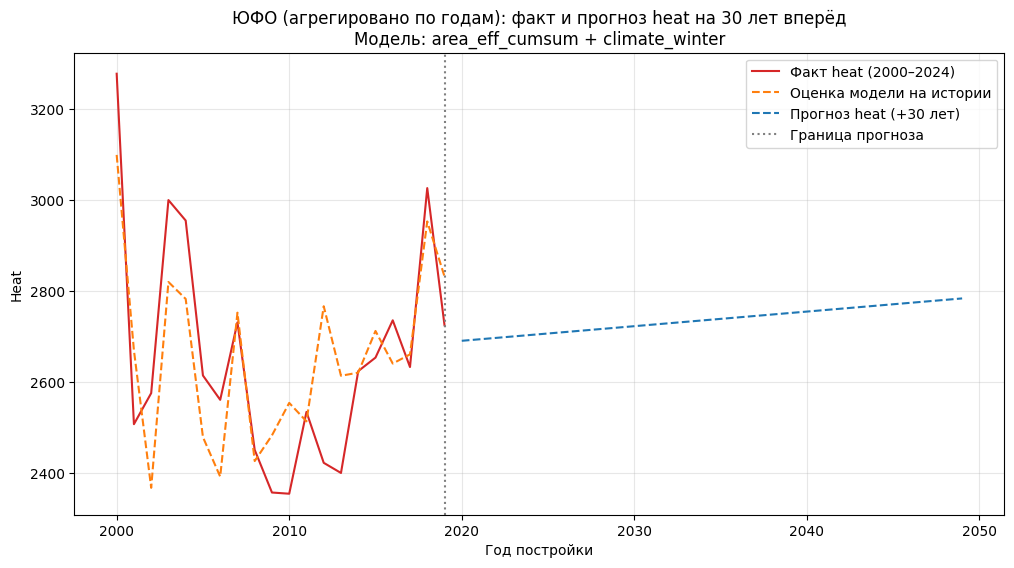

    built_year         heat  area_eff_cumsum  climate_winter    heat_pred  \
10      2010.0  2353.950000     2.153316e+07       -2.970000  2553.713753   
11      2011.0  2533.962500     2.193386e+07       -2.770000  2513.203075   
12      2012.0  2421.925000     2.246329e+07       -3.290000  2766.382976   
13      2013.0  2399.612500     2.304068e+07       -2.760000  2613.440535   
14      2014.0  2623.650000     2.365390e+07       -2.630000  2620.302880   
15      2015.0  2653.387500     2.429614e+07       -2.710000  2712.021854   
16      2016.0  2735.437500     2.482241e+07       -2.400000  2640.307226   
17      2017.0  2632.625000     2.520314e+07       -2.360000  2660.489716   
18      2018.0  3026.271429     2.856062e+07       -2.300000  2952.954762   
19      2019.0  2724.677143     2.544499e+07       -2.740000  2831.857871   
20      2020.0  2690.370609     2.551238e+07       -2.362000          NaN   
21      2021.0  2693.584081     2.577215e+07       -2.307714          NaN   

In [33]:
#ЮФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЮФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: -634.0046405570056
Coef area_eff_cumsum: 9.40971921140918e-05
Coef climate_winter: -391.0804588969736
R2 базовой модели: 0.5971769605422015
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


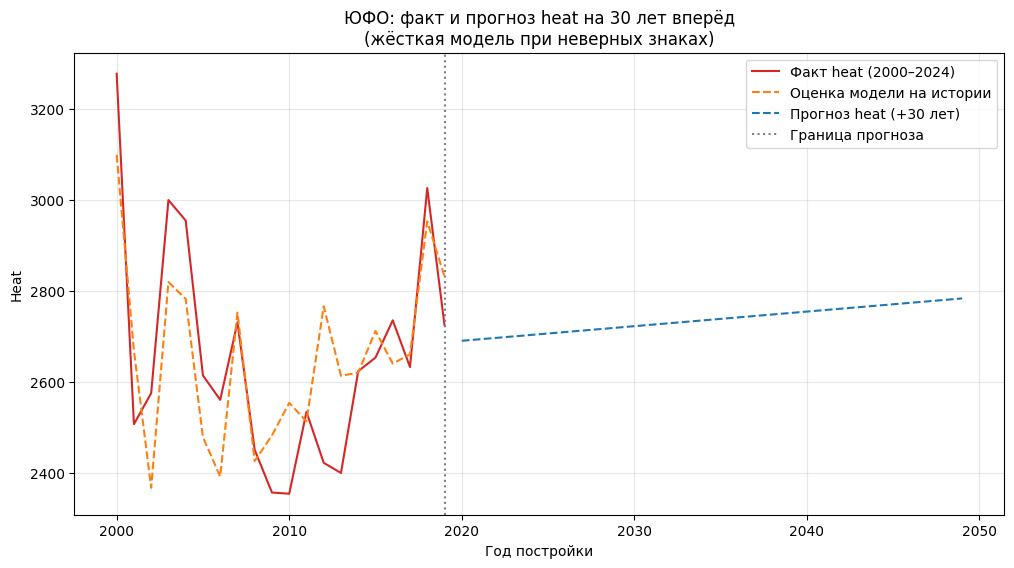

    built_year         heat    heat_pred     type
10      2010.0  2353.950000  2553.713753     Факт
11      2011.0  2533.962500  2513.203075     Факт
12      2012.0  2421.925000  2766.382976     Факт
13      2013.0  2399.612500  2613.440535     Факт
14      2014.0  2623.650000  2620.302880     Факт
15      2015.0  2653.387500  2712.021854     Факт
16      2016.0  2735.437500  2640.307226     Факт
17      2017.0  2632.625000  2660.489716     Факт
18      2018.0  3026.271429  2952.954762     Факт
19      2019.0  2724.677143  2831.857871     Факт
20      2020.0  2690.370609          NaN  Прогноз
21      2021.0  2693.584081          NaN  Прогноз
22      2022.0  2696.797553          NaN  Прогноз
23      2023.0  2700.011025          NaN  Прогноз
24      2024.0  2703.224497          NaN  Прогноз
25      2025.0  2706.437968          NaN  Прогноз
26      2026.0  2709.651440          NaN  Прогноз
27      2027.0  2712.864912          NaN  Прогноз
28      2028.0  2716.078384          NaN  Прогноз


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЮФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 2994.6495734126984
Coef area_eff_cumsum (std): 923.7980511619642
Coef climate_winter (std): -214.64521615318498


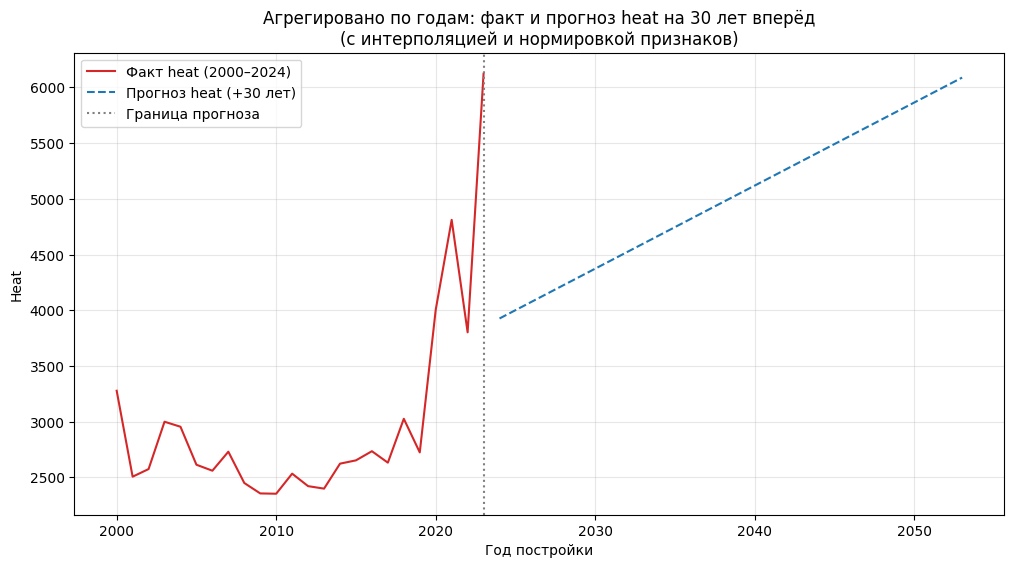

In [35]:
#ЮФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.5972
Базовые коэффициенты: [ 213.53211021 -148.14982602] Intercept: 2656.629154761905
R2 жёсткой модели: 0.5972
Финальные коэффициенты с фиксированными знаками: [ 213.53211021 -148.14982602] Intercept: 2656.629154761905


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


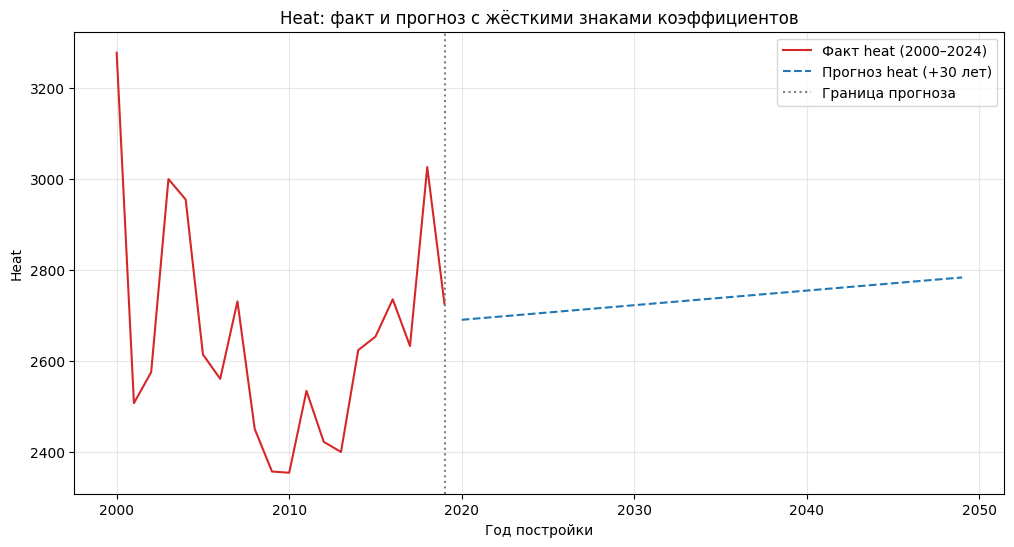

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2019)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


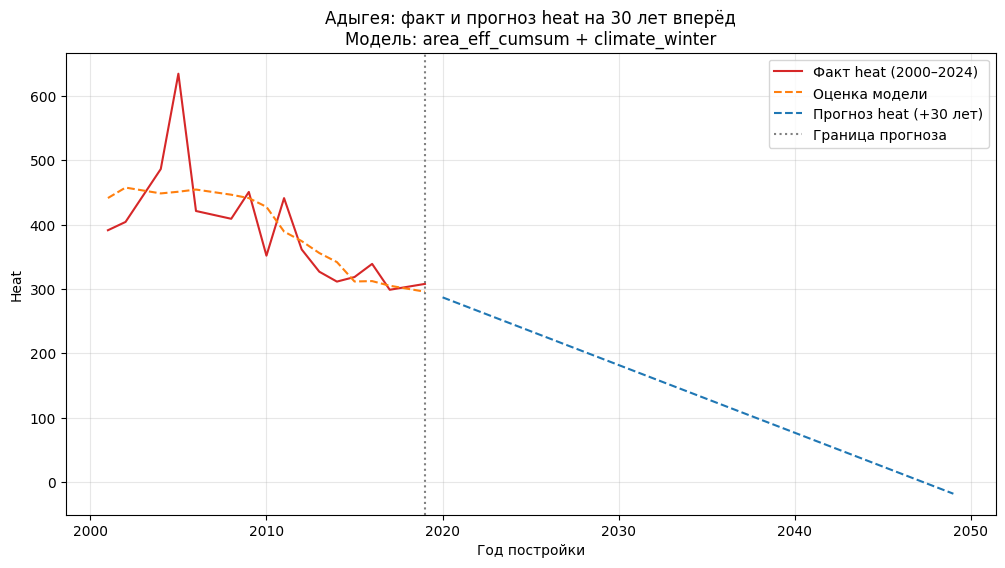

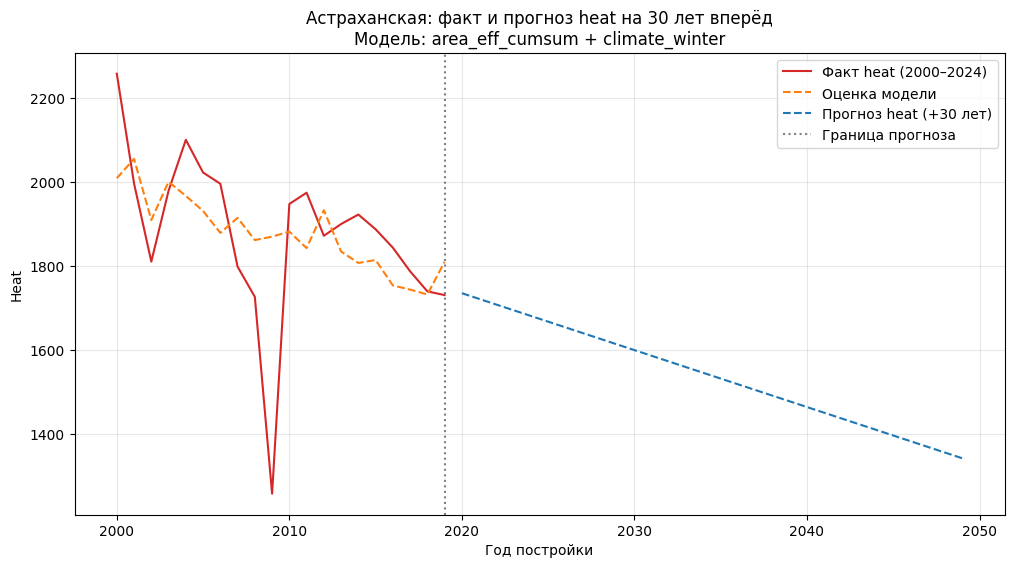

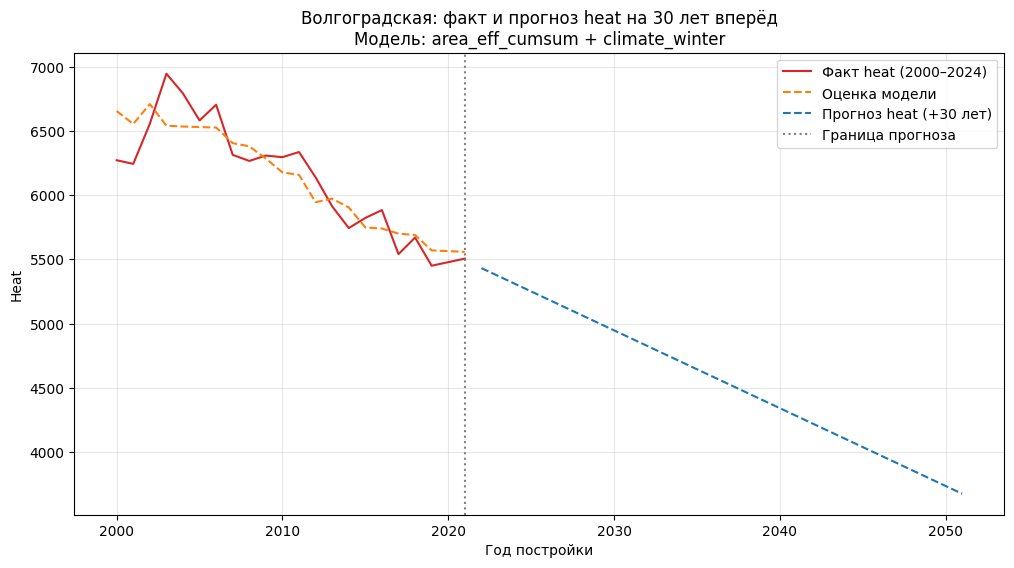

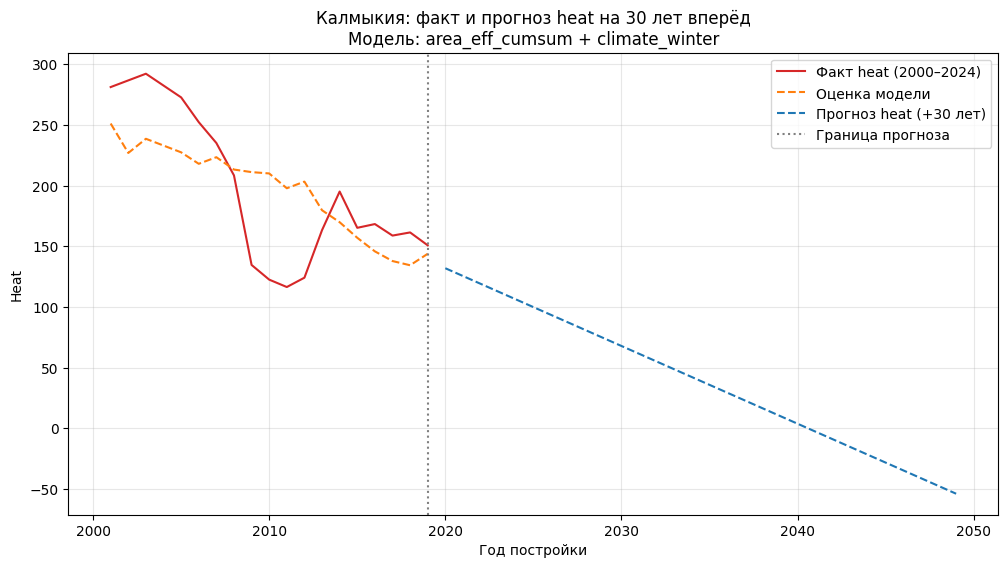

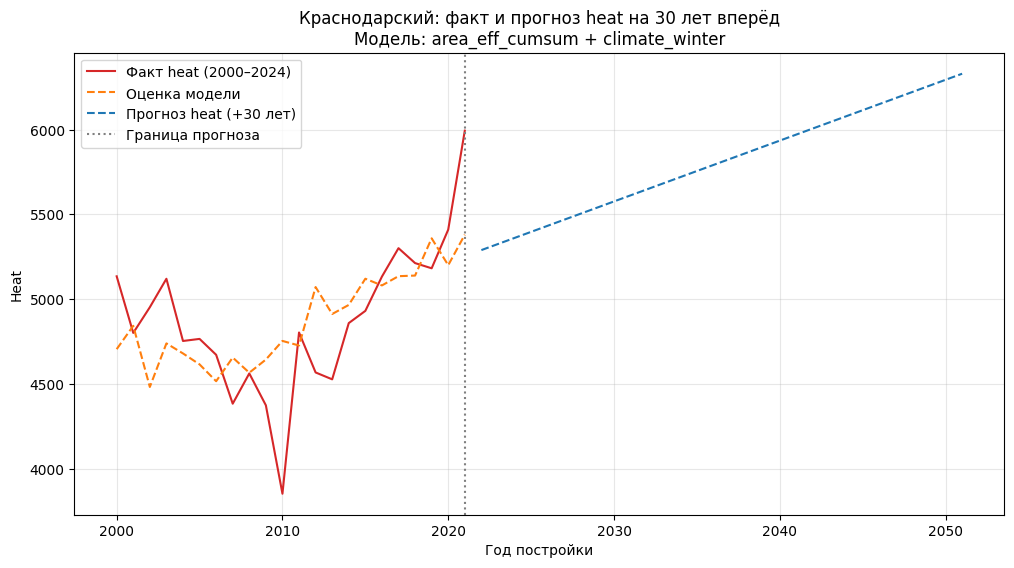

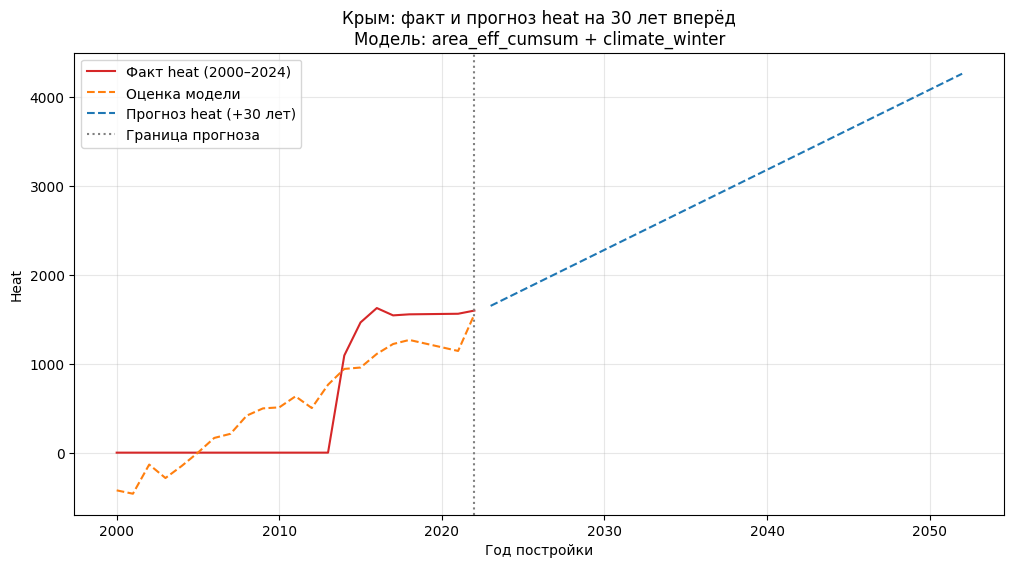

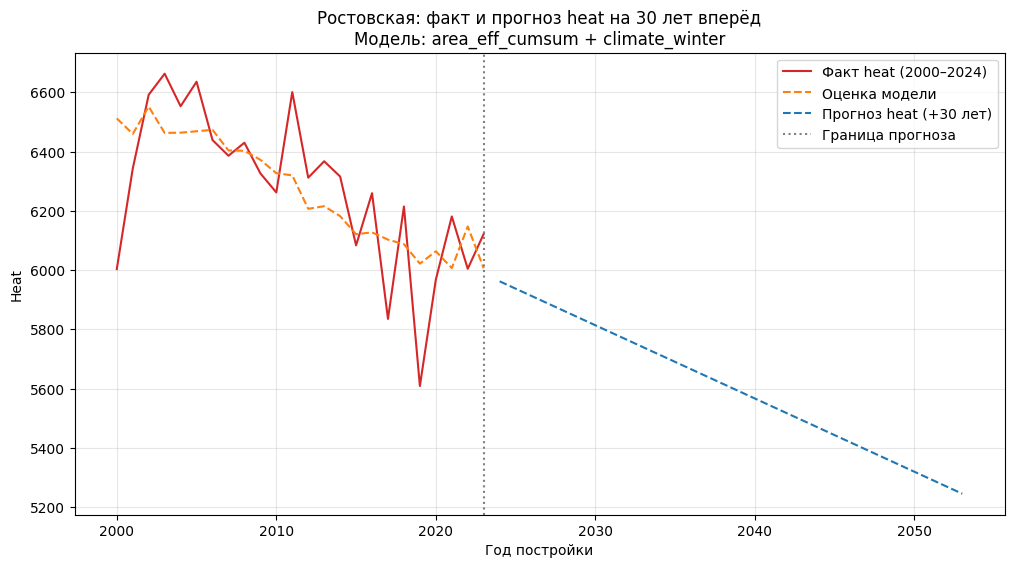

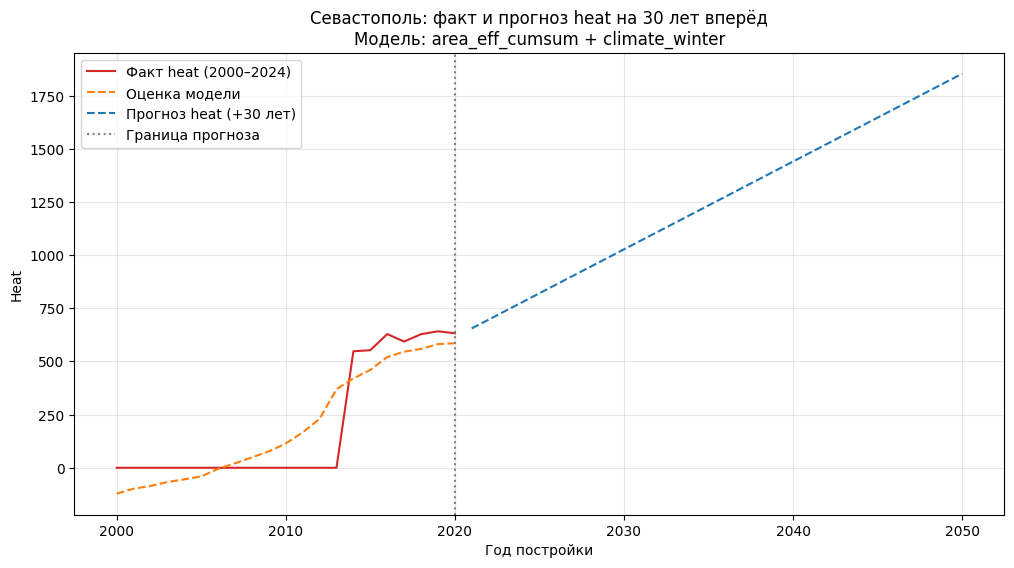

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0         Адыгея    957.831971             -0.000191            22.504198   
1   Астраханская   1725.395411             -0.000039          -176.953519   
2  Волгоградская  17025.718328             -0.000272           247.516242   
3       Калмыкия    433.833288             -0.000177           -24.885958   
4  Краснодарский   1858.973124              0.000036          -464.292450   
5           Крым -16265.390789              0.000717           355.790733   
6     Ростовская   9663.830646             -0.000066           133.470143   
7    Севастополь  -3068.322747              0.000323            -3.264079   

         R2  
0  0.515146  
1  0.205234  
2  0.804311  
3  0.372195  
4  0.382768  
5  0.677492  
6  0.474349  
7  0.807430  


In [37]:
#ЮФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .mean()
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


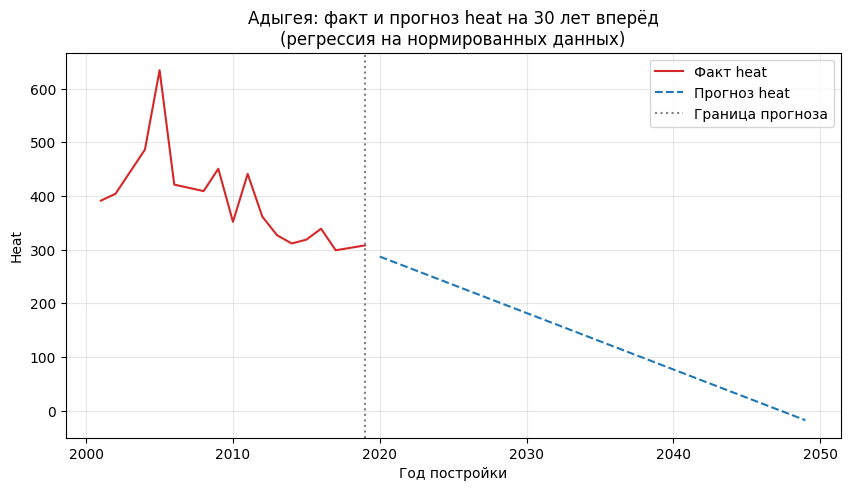

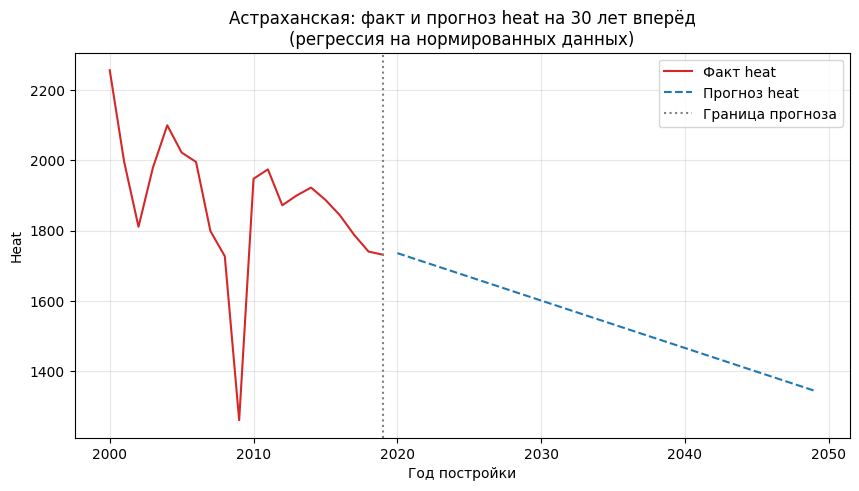

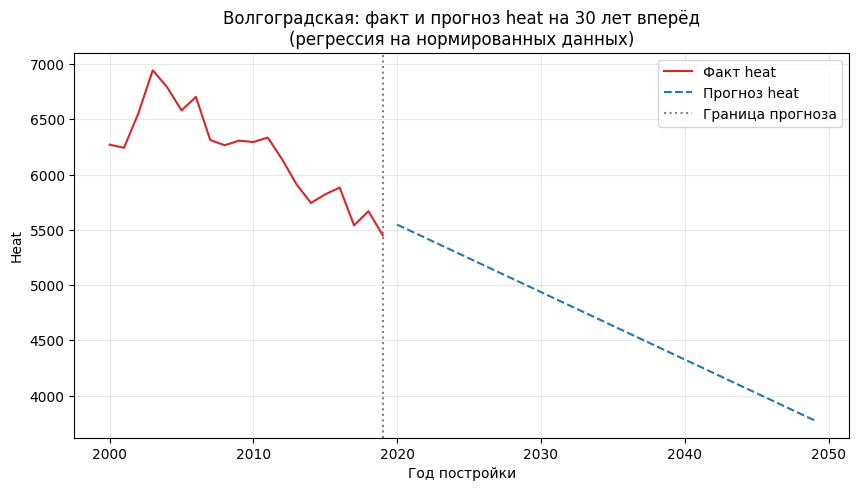

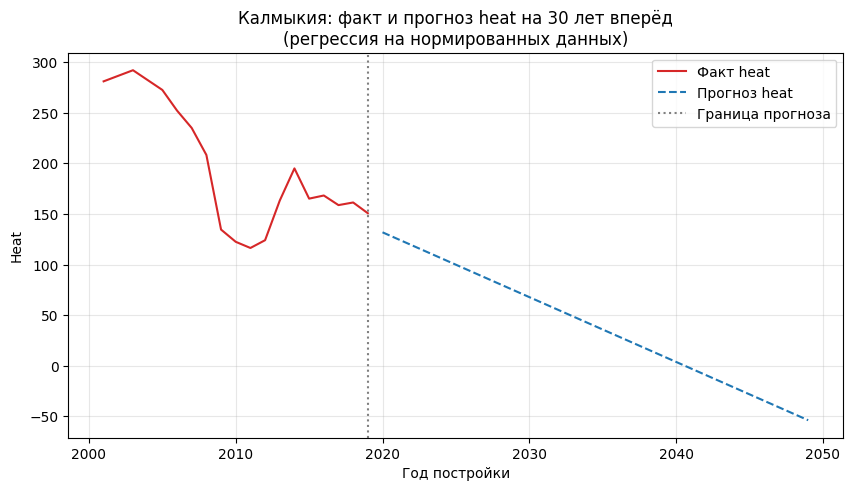

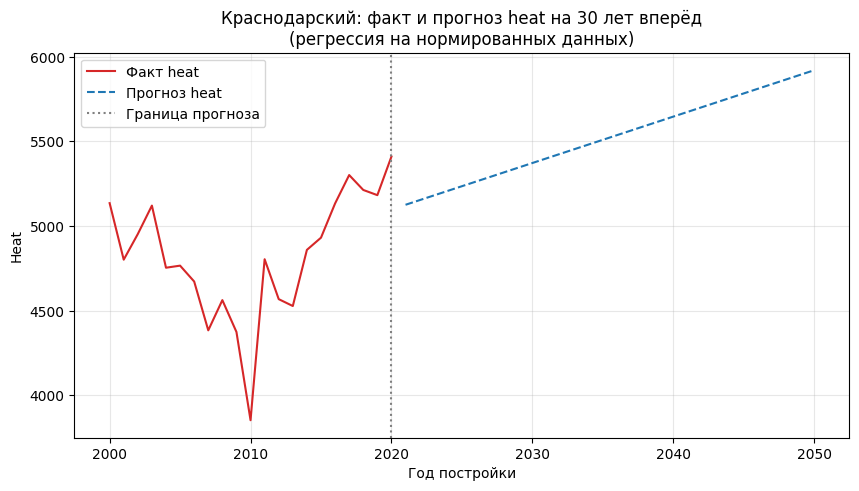

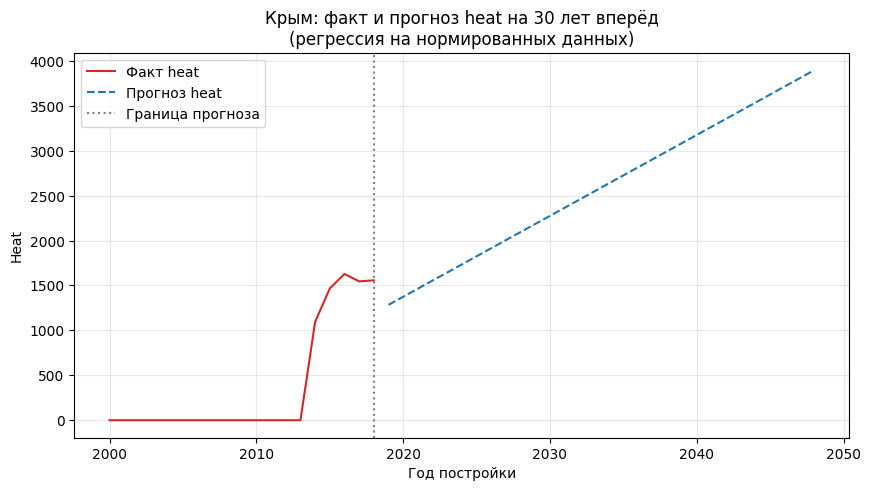

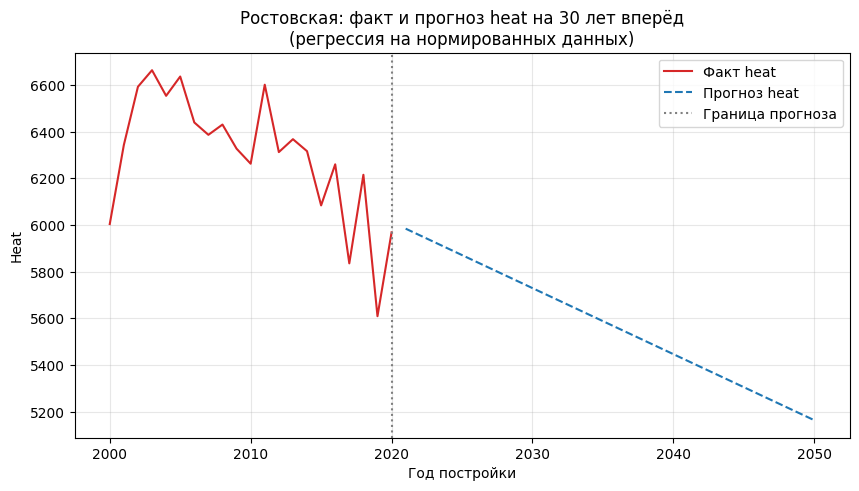

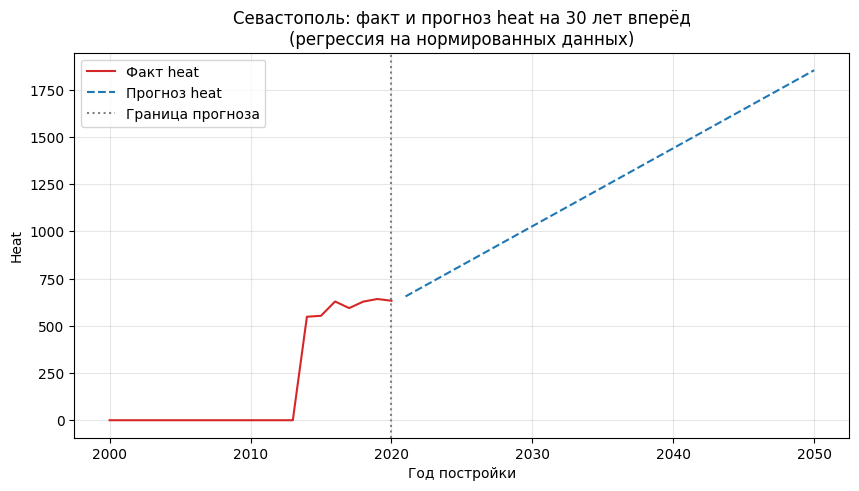

          Регион    Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0         Адыгея   390.921250            -65.141733             7.624062   
1   Астраханская  1877.531000            -22.660640           -67.033861   
2  Волгоградская  6188.565500           -427.202393            86.894665   
3       Калмыкия   193.836667            -28.837613            -9.053866   
4  Краснодарский  4823.691429            258.296738           -99.094600   
5           Крым   383.742105            329.488051           193.752248   
6     Ростовская  6295.234762           -288.917017           136.180906   
7    Севастополь   201.185714            257.401017            -1.264151   

   R2 (на истории)  
0         0.515146  
1         0.205234  
2         0.779093  
3         0.372195  
4         0.266564  
5         0.602347  
6         0.509582  
7         0.807430  


In [38]:
#ЮФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .mean()
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
